<a href="https://colab.research.google.com/github/hirofsgit/Python_1/blob/main/Chap9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 設定

In [ ]:
!pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 36.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=c39f455891b2605d9659e18734110e5db9e7d7d8d420be849cc6288cee6865fb
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import japanize_matplotlib
import scipy
from scipy import stats
import copy
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import statsmodels.formula.api as smf
from matplotlib.collections import LineCollection
from scipy import special

# 9.1

## 表9.1

In [ ]:
insurance = pd.read_csv("/content/insurance.txt", delimiter=" ")

In [ ]:
insurance.head()

,age,n,y
0,30,116,0
1,31,44,0
2,32,95,0
3,33,97,0
4,34,120,0


In [ ]:
insurance["h_hat"] = insurance.y / insurance.n

In [ ]:
def s_hat(h_hat):
    s = 1
    svals = []
    for hval in h_hat:
        s *= (1 - hval)
        svals.append(s)
    return svals

In [ ]:
insurance["S_hat"] = s_hat(insurance.h_hat)

In [ ]:
insurance.set_index("age").round(3)

,n,y,h_hat,S_hat
age,,,,
30,116,0,0.000,1.000
31,44,0,0.000,1.000
32,95,0,0.000,1.000
33,97,0,0.000,1.000
34,120,0,0.000,1.000
35,71,1,0.014,0.986
36,125,0,0.000,0.986
37,122,0,0.000,0.986
38,82,0,0.000,0.986


# 9.2

## 表9.3

In [ ]:
ncog = pd.read_csv("/content/ncog.txt", delimiter=" ")
ncog.sort_values(["arm", "t"], inplace=True)
ncog.reset_index(drop=True, inplace=True)

In [ ]:
ncog.head()

,day,month,year,t,d,arm
0,5,2,81,7,1,A
1,30,11,82,34,1,A
2,27,9,83,42,1,A
3,9,5,80,63,1,A
4,23,4,81,64,1,A


In [ ]:
ncog["month_in_study"] = (ncog.t / (365 / 12)).astype("int") + 1

In [ ]:
ncog_a_temp = ncog.loc[ncog.arm == "A"]
ncog_b_temp = ncog.loc[ncog.arm == "B"]

In [ ]:
ncog_a_temp = ncog_a_temp.groupby("month_in_study").agg(
    {"t": "count", "d": "sum"}
).rename(columns={"t": "n_events", "d": "y"})

ncog_b_temp = ncog_b_temp.groupby("month_in_study").agg(
    {"t": "count", "d": "sum"}
).rename(columns={"t": "n_events", "d": "y"})

In [ ]:
ncog_a_temp["l"] = ncog_a_temp.n_events - ncog_a_temp.y
ncog_b_temp["l"] = ncog_b_temp.n_events - ncog_b_temp.y

In [ ]:
ncog_a_temp.tail()

,n_events,y,l
month_in_study,,,
37,2,1,1
38,1,1,0
41,1,0,1
45,1,0,1
47,2,1,1


In [ ]:
def fillmonths(dfin):
    data = np.zeros((dfin.index.max(), 4), dtype="int")

    n = dfin.n_events.sum()
    y = dfin.y.values
    l = dfin.l.values

    prev_month = 0
    i = 0
    while i < dfin.shape[0]:
        month = dfin.index[i]
        # fill in missing months
        while month != prev_month + 1:
            prev_month += 1
            data[prev_month - 1, :] = [prev_month, n, 0, 0]
        yval = y[i]
        lval = l[i]
        data[month - 1, :] = (month, n, yval, lval)
        prev_month = month
        n -= (yval + lval)
        i += 1

    return pd.DataFrame(data, columns=["Month", "n", "y", "l"])

In [ ]:
ncog_months_a = fillmonths(ncog_a_temp)
ncog_months_b = fillmonths(ncog_b_temp)

In [ ]:
ncog_months_a.tail()

,Month,n,y,l
42,43,3,0,0
43,44,3,0,0
44,45,3,0,1
45,46,2,0,0
46,47,2,1,1


In [ ]:
ncog_months_a["h_hat"] = ncog_months_a.y / ncog_months_a.n
ncog_months_b["h_hat"] = ncog_months_b.y / ncog_months_b.n

In [ ]:
def s_hat(h_hat):
    s = 1
    svals = []
    for hval in h_hat:
        s *= (1 - hval)
        svals.append(s)
    return svals

In [ ]:
ncog_months_a["S_hat"] = s_hat(ncog_months_a.h_hat)
ncog_months_b["S_hat"] = s_hat(ncog_months_b.h_hat)

In [ ]:
ncog_months_a.to_csv("/content/ncog_months_a.csv", index=False)
ncog_months_b.to_csv("/content/ncog_months_b.csv", index=False)

In [ ]:
ncog_months_a.set_index("Month").round(3)

,n,y,l,h_hat,S_hat
Month,,,,,
1,51,1,0,0.020,0.980
2,50,2,0,0.040,0.941
3,48,5,1,0.104,0.843
4,42,2,0,0.048,0.803
5,40,8,0,0.200,0.642
6,32,7,0,0.219,0.502
7,25,0,1,0.000,0.502
8,24,3,0,0.125,0.439
9,21,2,0,0.095,0.397


In [ ]:
ncog_months_b.set_index("Month").round(3)

,n,y,l,h_hat,S_hat
Month,,,,,
1,45,0,0,0.000,1.000
2,45,1,0,0.022,0.978
3,44,1,0,0.023,0.956
4,43,5,0,0.116,0.844
5,38,5,0,0.132,0.733
...,...,...,...,...,...
72,1,0,0,0.000,0.241
73,1,0,0,0.000,0.241
74,1,0,0,0.000,0.241


## 図9.1

In [ ]:
ncog_months_a = pd.read_csv("/content/ncog_months_a.csv")
ncog_months_b = pd.read_csv("/content/ncog_months_b.csv")

In [ ]:
def kaplan_meier(events):
    events = sorted(events)
    svals = []
    tvals = []
    s = 1
    n = len(events)
    for k, (t, d) in enumerate(events, 1):
        if d == 1:
            s *= (n - k) / (n - k + 1)
        svals.append(s)
        tvals.append(t)
    return svals, tvals

In [ ]:
ncog_arm_a = ncog.loc[ncog.arm == "A"]
ncog_arm_b = ncog.loc[ncog.arm == "B"]

events_a = list(zip(ncog_arm_a.t, ncog_arm_a.d))
events_b = list(zip(ncog_arm_b.t, ncog_arm_b.d))

svals_a, tvals_a = kaplan_meier(events_a)
svals_b, tvals_b = kaplan_meier(events_b)

In [ ]:
def greenwood_ci(svals, events, sd_time):
    events = sorted(events)
    summand = 0
    n = len(events)
    n_deaths = 0
    for k, (t, d) in enumerate(events):
        if t >= sd_time:
            break
        if d == 1:
            n_deaths += 1
            summand += 1 / ((n - k) * (n - k - 1))
    sj = svals[k - 1]
    lo = np.exp(np.log(sj) - 1.96 * np.sqrt(summand))
    hi = np.exp(np.log(sj) + 1.96 * np.sqrt(summand))
    return lo, hi

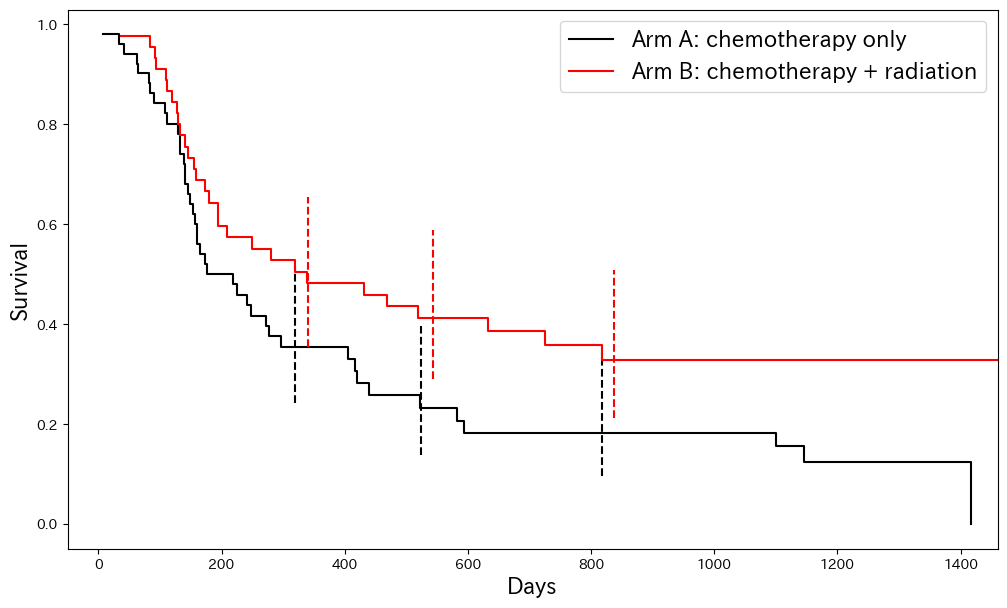

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(
    tvals_a,
    svals_a,
    drawstyle="steps-post",
    c="k",
    label="Arm A: chemotherapy only"
)
for t in [320, 524, 818]:
    lo, hi = greenwood_ci(svals_a, events_a, t)
    ax.plot([t, t], [lo, hi], c="k", linestyle="--")

ax.plot(
    tvals_b,
    svals_b,
    drawstyle="steps-post",
    c="r",
    label="Arm B: chemotherapy + radiation"
)
for t in [340, 544, 838]:
    lo, hi = greenwood_ci(svals_b, events_b, t)
    ax.plot([t, t], [lo, hi], c="r", linestyle="--")

ax.legend(fontsize=16)
ax.set_xlabel("Days", size=16)
ax.set_ylabel("Survival", size=16)

ax.set_xlim(-50, 1460);


対数変換後の分布

In [ ]:
df_a = pd.read_csv("/content/ncog_months_a.csv")
df_b = pd.read_csv("/content/ncog_months_b.csv")

In [ ]:
df_a.head()

,Month,n,y,l,h_hat,S_hat
0,1,51,1,0,0.019608,0.980392
1,2,50,2,0,0.040000,0.941176
2,3,48,5,1,0.104167,0.843137
3,4,42,2,0,0.047619,0.802988
4,5,40,8,0,0.200000,0.642390


In [ ]:
df_a["log_S_hat"]=np.log(df_a['S_hat'])
df_b["log_S_hat"]=np.log(df_b['S_hat'])

In [ ]:
df_a.head()

,Month,n,y,l,h_hat,S_hat,log_S_hat
0,1,51,1,0,0.019608,0.980392,-0.019803
1,2,50,2,0,0.040000,0.941176,-0.060625
2,3,48,5,1,0.104167,0.843137,-0.170626
3,4,42,2,0,0.047619,0.802988,-0.219416
4,5,40,8,0,0.200000,0.642390,-0.442559


In [ ]:
df_b.head()

,Month,n,y,l,h_hat,S_hat,log_S_hat
0,1,45,0,0,0.000000,1.000000,0.000000
1,2,45,1,0,0.022222,0.977778,-0.022473
2,3,44,1,0,0.022727,0.955556,-0.045462
3,4,43,5,0,0.116279,0.844444,-0.169076
4,5,38,5,0,0.131579,0.733333,-0.310155


In [ ]:
len(df_b)

76

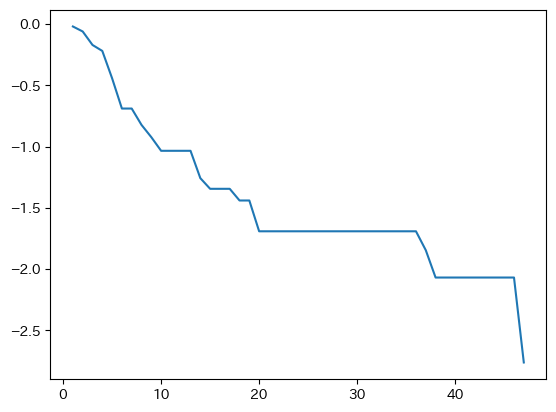

In [ ]:
plt.plot(df_a['Month'],df_a["log_S_hat"])

## 図9.2

In [ ]:
from scipy.interpolate import UnivariateSpline

In [ ]:
spline_a = UnivariateSpline(df_a['Month'],df_a['h_hat'], k=3)
spline_b = UnivariateSpline(df_b['Month'],df_b['h_hat'], k=3)

In [ ]:
x_pred= np.linspace(0, 40,45)
y_pred_a = spline_a(x_pred)
y_pred_b = spline_b(x_pred)

Text(0, 0.5, 'Hazard')

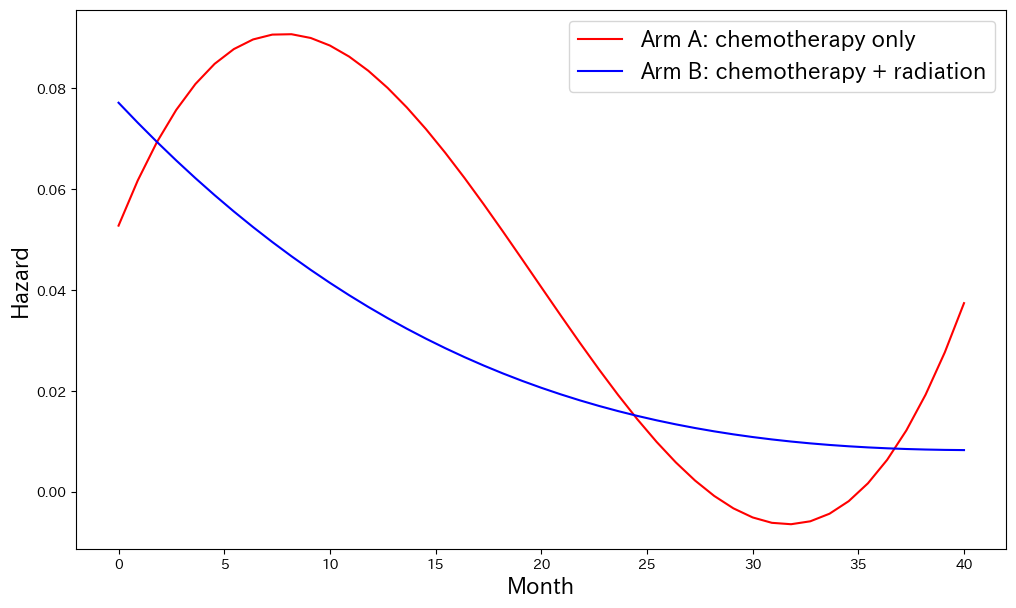

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(x_pred, y_pred_a, color='red', label='Arm A: chemotherapy only')
ax.plot(x_pred, y_pred_b, color='blue', label="Arm B: chemotherapy + radiation")

ax.legend(fontsize=16)
ax.set_xlabel("Month", size=16)
ax.set_ylabel("Hazard", size=16)